In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
import numpy as np

In [15]:
pace = pd.read_csv('Pace of life.csv', na_values = ':')
pace

,City,Walk,Bank,Talk,Heart
0,Boston,28,31,24,24
1,Buffalo,23,30,23,29
2,New York,24,29,18,31
3,Salt Lake City,28,28,23,26
4,Columbus,22,27,30,26
5,Worcester,25,26,24,20
6,Providence,26,30,24,17
7,Springfield,30,28,21,19
8,Rochester,22,33,18,26
9,Kansas City,22,33,22,24


In [17]:
pace.describe()

,Walk,Bank,Talk,Heart
count,36.000000,36.000000,36.000000,36.000000
mean,21.416667,26.361111,20.750000,19.805556
std,4.285357,4.408776,4.129165,5.214373
min,12.000000,13.000000,10.000000,11.000000
25%,18.750000,24.000000,18.000000,16.000000
50%,22.000000,26.500000,22.000000,19.000000
75%,23.250000,29.250000,23.250000,24.000000
max,30.000000,34.000000,30.000000,31.000000


Text(0, 0.5, 'Walk')

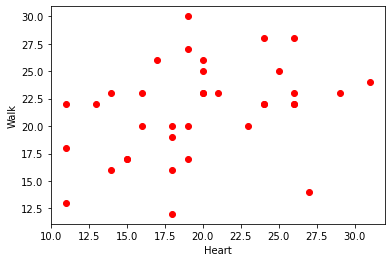

In [9]:
x = pace.Heart
y = pace.Walk
plt.scatter(x,y, color="red")
plt.xlabel('Heart')
plt.ylabel('Walk')

/home/a01252135/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


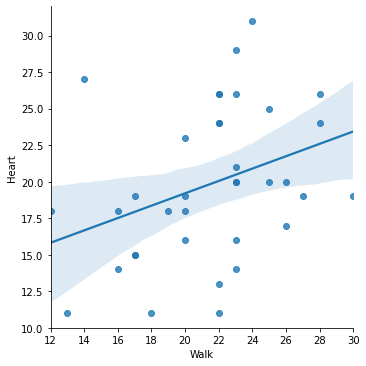

In [10]:
sns.lmplot("Walk","Heart",pace)

In [11]:
grouped = pace.groupby('Walk')
walk_means = grouped.mean()
walk_variances = grouped.var()
print('Means: ', walk_means)
print('Variances: ', walk_variances)

Means:             Bank       Talk      Heart
Walk                                 
12    31.000000  19.000000  18.000000
13    26.000000  22.000000  11.000000
14    34.000000  22.000000  27.000000
16    26.500000  15.500000  16.000000
17    24.000000  17.333333  16.333333
18    29.000000  25.000000  11.000000
19    20.000000  22.000000  18.000000
20    21.500000  17.500000  19.000000
22    27.000000  21.000000  20.666667
23    26.285714  22.571429  20.857143
24    29.000000  18.000000  31.000000
25    28.000000  22.000000  22.500000
26    27.500000  21.500000  18.500000
27    25.000000  27.000000  19.000000
28    29.500000  23.500000  25.000000
30    28.000000  21.000000  19.000000
Variances:             Bank       Talk      Heart
Walk                                 
12          NaN        NaN        NaN
13          NaN        NaN        NaN
14          NaN        NaN        NaN
16    12.500000  60.500000   8.000000
17     3.000000   4.333333   5.333333
18          NaN        NaN    

In [12]:
from sklearn.linear_model import LinearRegression

est =  LinearRegression(fit_intercept = True)

x = pace[['Walk']]
y = pace [['Heart']]

est.fit(x, y)

print("Coefficients: ", est.coef_)
print("Intercept: ", est.intercept_)

Coefficients:  [[0.42305199]]
Intercept:  [10.7451921]


In [13]:
pace.isnull().sum()

City     0
Walk     0
Bank     0
Talk     0
Heart    0
dtype: int64

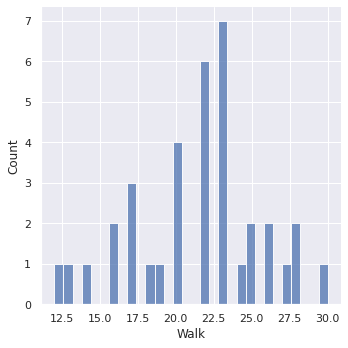

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(pace['Walk'], bins=30)
plt.show()

<AxesSubplot:>

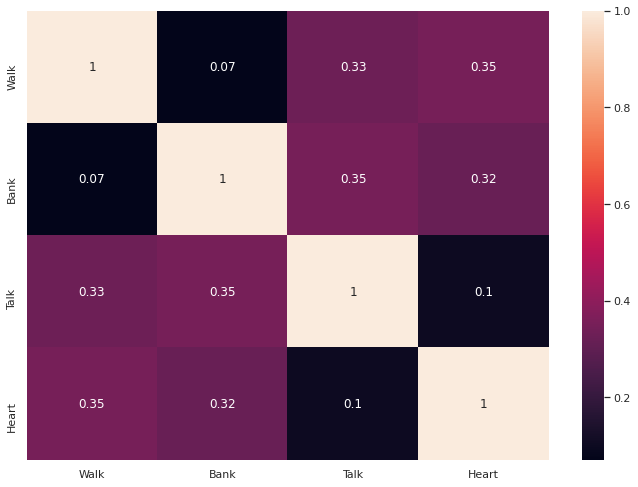

In [43]:
correlation_matrix = pace.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)